In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import os

### Billboard

In [4]:
stuff = pd.read_csv('../data/billboard_songs.csv')

In [5]:
stuff.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,NaN,1,1
1,http://www.billboard.com/charts/hot-100/1995-1...,12/2/1995,1,One Sweet Day,Mariah Carey & Boyz II Men,One Sweet DayMariah Carey & Boyz II Men,1,NaN,1,1
2,http://www.billboard.com/charts/hot-100/1997-1...,10/11/1997,1,Candle In The Wind 1997/Something About The Wa...,Elton John,Candle In The Wind 1997/Something About The Wa...,1,NaN,1,1
3,http://www.billboard.com/charts/hot-100/2006-0...,7/1/2006,1,Do I Make You Proud,Taylor Hicks,Do I Make You ProudTaylor Hicks,1,NaN,1,1
4,http://www.billboard.com/charts/hot-100/2009-1...,10/24/2009,1,3,Britney Spears,3Britney Spears,1,NaN,1,1


In [6]:
stuff.shape

(320495, 10)

In [7]:
stuff.groupby('SongID').count().shape

(28474, 9)

### LastFM

In [8]:
lastfm_profile = pd.read_csv('../data/usersha1-profile.csv', names=['user_id', 'gender', 'age', 'country', 'registered'])

In [9]:
lastfm_profile.head()

,user_id,gender,age,country,registered
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007"
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,"Dec 4, 2007"
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,"Sep 1, 2006"
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,"Apr 28, 2008"
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,"Jan 27, 2006"


In [10]:
lastfm_profile.shape

(359347, 5)

In [11]:
lastfm_usersong = pd.read_csv('../data/usersha1-artmbid-artname-plays.tsv', sep='\t', names=['user_id', 'artist_id', 'artist_name', 'plays'])

In [12]:
lastfm_usersong.head()

,user_id,artist_id,artist_name,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706


In [13]:
lastfm_usersong.shape

(17535655, 4)

### Cleaned Data

In [14]:
cleaned_users = lastfm_profile[['user_id', 'age', 'country']].dropna().reset_index(drop=True)

In [15]:
print("There are {} users in the dataset".format(cleaned_users.shape[0]))

There are 284447 users in the dataset


In [16]:
cleaned_users_us = cleaned_users[cleaned_users['country'] == 'United States']

In [17]:
print("There are {} users in the dataset from the United States".format(cleaned_users_us.shape[0]))

There are 52286 users in the dataset from the United States


In [18]:
cleaned_users = cleaned_users_us[cleaned_users_us['age'] > 0]

In [19]:
import matplotlib.pyplot as plt

(array([1.6200e+02, 9.0730e+03, 3.0672e+04, 8.6050e+03, 2.3950e+03,
        8.4300e+02, 1.9200e+02, 3.6000e+01, 2.4000e+01, 5.0000e+01]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <a list of 10 Patch objects>)

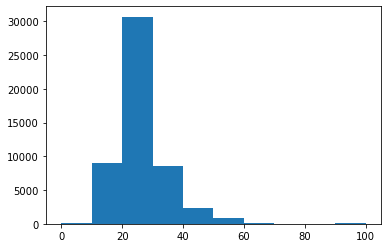

In [20]:
plt.hist(cleaned_users.age, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

In [21]:
age_bins = ((cleaned_users.age // 10) * 10).value_counts().reset_index().sort_values(by='index')
age_bins

,index,age
7,0.0,162
1,10.0,9073
0,20.0,30672
2,30.0,8605
3,40.0,2395
4,50.0,843
6,60.0,192
8,70.0,36
10,80.0,24
9,90.0,32


### Define Age Range

In [22]:
cleaned_users.head()

,user_id,age,country
2,00007a47085b9aab8af55f52ec8846ac479ac4fe,28.0,United States
8,0001a57568309b287363e72dc682e9a170ba6dc2,23.0,United States
10,00024b5b85c40f990c28644d53257819980bf6bb,23.0,United States
14,0002dd2154072434d26e5409faa591bfb260a01e,30.0,United States
15,00032c7933e0eb05f2258f1147ef81a90f2d4d6c,26.0,United States


In [23]:
def extract_users(df, age, age_range):
    start = age - age_range
    end = age + age_range
    users_selected = df[(df['age'] >= start) & (df['age'] <= end)].reset_index(drop=True)
    return users_selected

In [24]:
extract_users(cleaned_users, 55, 5)

,user_id,age,country
0,000912716c36131c4d8591da475c93337e7196a7,57.0,United States
1,00496ca782bbd63ef3fb5ac7db30cc7bef508e22,50.0,United States
2,00f251370e500f9a3a93f38d8610fe38f6bbb3f5,51.0,United States
3,01870107318a18555a17bc7ed62aa4cbf7cf27f6,58.0,United States
4,01e217e8c9b0babb4f882588d1e25d72788ea18e,55.0,United States
...,...,...,...
872,ff7cc3cd351f27a04d448d51e51850958651e01b,55.0,United States
873,ffa0ec4145d448cc3cbde94a672a4dfd7cb9c4f5,53.0,United States
874,ffd606bb03cfeed357d5236e4dcb9302646809e2,53.0,United States
875,ffdcf32821979d43b94346a67985649296296565,50.0,United States


### Apply Age Range to Artist Listening History

In [25]:
def extract_histories(df, users):
    extracted_history = df[df['user_id'].isin(users['user_id'])]
    return extracted_history

In [26]:
chosen_users = extract_users(cleaned_users, 55, 5)

In [27]:
cleaned_history = lastfm_usersong[['user_id', 'artist_id', 'artist_name', 'plays']].dropna().reset_index(drop=True)

In [28]:
cleaned_history = extract_histories(cleaned_history, cleaned_users)

In [29]:
cleaned_history.head()

,user_id,artist_id,artist_name,plays
194,00007a47085b9aab8af55f52ec8846ac479ac4fe,0110e63e-0a9b-4818-af8e-41e180c20b9a,devendra banhart,456
195,00007a47085b9aab8af55f52ec8846ac479ac4fe,69158f97-4c07-4c4e-baf8-4e4ab1ed666e,boards of canada,407
196,00007a47085b9aab8af55f52ec8846ac479ac4fe,e162b2eb-6a42-4240-8c1b-c94d9a0acb73,cocorosie,386
197,00007a47085b9aab8af55f52ec8846ac479ac4fe,f22942a1-6f70-4f48-866e-238cb2308fbd,aphex twin,213
198,00007a47085b9aab8af55f52ec8846ac479ac4fe,0c751690-c784-4a4f-b1e4-c1de27d47581,animal collective,203


In [30]:
cleaned_history.shape

(2575300, 4)

In [31]:
chosen_history = extract_histories(cleaned_history, chosen_users)

In [32]:
chosen_users.head()

,user_id,age,country
0,000912716c36131c4d8591da475c93337e7196a7,57.0,United States
1,00496ca782bbd63ef3fb5ac7db30cc7bef508e22,50.0,United States
2,00f251370e500f9a3a93f38d8610fe38f6bbb3f5,51.0,United States
3,01870107318a18555a17bc7ed62aa4cbf7cf27f6,58.0,United States
4,01e217e8c9b0babb4f882588d1e25d72788ea18e,55.0,United States


In [33]:
chosen_history.head()

,user_id,artist_id,artist_name,plays
2633,000912716c36131c4d8591da475c93337e7196a7,02294a9c-c924-4a59-877d-3ee98ee05ae1,sexteto mayor,29
2634,000912716c36131c4d8591da475c93337e7196a7,4d483147-c871-48c4-8470-85e5a66381c5,celtic woman,24
2635,000912716c36131c4d8591da475c93337e7196a7,7629ca32-b4fd-4598-aa20-956552826ee3,patrick williams,24
2636,000912716c36131c4d8591da475c93337e7196a7,4f8ef4a3-40fa-46b5-8773-97686a8424f4,Édith piaf,18
2637,000912716c36131c4d8591da475c93337e7196a7,3c004c98-aab6-4b63-a2df-e07c98e73b0a,josé feliciano,13


In [34]:
most_occurrence = pd.DataFrame(chosen_history.groupby('artist_name')['plays'].count().sort_values(ascending=False))

In [35]:
most_occurrence[:20]

,plays
artist_name,
the beatles,318
the rolling stones,212
bob dylan,185
the who,145
pink floyd,135
neil young,134
led zeppelin,133
fleetwood mac,125
simon & garfunkel,122


### Working with Spotipy

### Working with Spotipy

In [36]:
import spotipy

In [37]:
# Application information
client_id = 'f78a4f4cfe9c40ea8fe346b0576e98ea'
client_secret = 'c26db2d4c1fb42d79dc99945b2360ab4'

# Temporary placeholder until we actually get a website going
redirect_uri = 'https://google.com/'

# The permissions that our application will ask for
scope = " ".join(['playlist-modify-public',"user-top-read","user-read-recently-played","playlist-read-private"])

username = 'gazzaniga3'

In [38]:
%%cmd

SET SPOTIPY_CLIENT_ID=client_id
SET SPOTIPY_CLIENT_SECRET=client_secret
SET SPOTIPY_REDIRECT_URI=redirect_uri

Microsoft Windows [Version 10.0.19042.804]
(c) 2020 Microsoft Corporation. All rights reserved.

C:\Users\sarat\GitHub\DSC180b-Capstone\notebooks>
C:\Users\sarat\GitHub\DSC180b-Capstone\notebooks>SET SPOTIPY_CLIENT_ID=client_id

C:\Users\sarat\GitHub\DSC180b-Capstone\notebooks>SET SPOTIPY_CLIENT_SECRET=client_secret

C:\Users\sarat\GitHub\DSC180b-Capstone\notebooks>SET SPOTIPY_REDIRECT_URI=redirect_uri

C:\Users\sarat\GitHub\DSC180b-Capstone\notebooks>

In [39]:
print(os.environ.get('SPOTIPY_CLIENT_ID'))
print(os.environ.get('SPOTIPY_CLIENT_SECRET'))
print(os.environ.get('SPOTIPY_REDIRECT_URI'))

None
None
None


In [40]:
# Oauth object    
sp_oauth = spotipy.oauth2.SpotifyOAuth(client_id, client_secret, redirect_uri, scope=scope, username=username)

# Force auth every time
authUrl = sp_oauth.get_authorize_url()
authUrl

'https://accounts.spotify.com/authorize?client_id=f78a4f4cfe9c40ea8fe346b0576e98ea&response_type=code&redirect_uri=https%3A%2F%2Fgoogle.com%2F&scope=playlist-modify-public+playlist-read-private+user-read-recently-played+user-top-read'

In [41]:
try:
    sp = spotipy.Spotify(auth_manager=sp_oauth)
except:
    os.remove(f'.cache-{username}')
    sp = spotipy.Spotify(auth_manager=sp_oauth)


In [42]:
get_artist = sp.search("the beatles")['tracks']['items'][0]['album']['artists'][0]['uri']

In [43]:
get_artist

'spotify:artist:3WrFJ7ztbogyGnTHbHJFl2'

In [44]:
get_tracks = sp.artist_top_tracks(get_artist)

In [45]:
get_tracks

{'tracks': [{'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3WrFJ7ztbogyGnTHbHJFl2'},
      'href': 'https://api.spotify.com/v1/artists/3WrFJ7ztbogyGnTHbHJFl2',
      'id': '3WrFJ7ztbogyGnTHbHJFl2',
      'name': 'The Beatles',
      'type': 'artist',
      'uri': 'spotify:artist:3WrFJ7ztbogyGnTHbHJFl2'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/0ETFjACtuP2ADo6LFhL6HN'},
    'href': 'https://api.spotify.com/v1/albums/0ETFjACtuP2ADo6LFhL6HN',
    'id': '0ETFjACtuP2ADo6LFhL6HN',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273dc30583ba717007b00cceb25',
      'width': 640},
     {'height': 300,
      'url': 'https://i.scdn.co/image/ab67616d00001e02dc30583ba717007b00cceb25',
      'width': 300},
     {'height': 64,
      'url': 'https://i.scdn.co/image/ab67616d00004851dc30583ba717007b00cceb25',
      'width': 64}],
    'name': 'Abbey Road (Remastered)',
    'releas

In [46]:
top_tracks = []

In [47]:
for track in get_tracks['tracks'][:10]:
    top_tracks.append(track['name'])

In [48]:
top_tracks

['Here Comes The Sun - Remastered 2009',
 'Come Together - Remastered 2009',
 'Let It Be - Remastered 2009',
 'Yesterday - Remastered 2009',
 'Hey Jude - Remastered 2015',
 'Blackbird - Remastered 2009',
 'Twist And Shout - Remastered 2009',
 'In My Life - Remastered 2009',
 'I Want To Hold Your Hand - Remastered 2015',
 'Help! - Remastered 2009']

In [49]:
get_related_artists = sp.artist_related_artists(get_artist)

In [50]:
get_related_artists

{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4x1nvY2FN8jxqAFA0DA02H'},
   'followers': {'href': None, 'total': 3944387},
   'genres': ['album rock',
    'art rock',
    'beatlesque',
    'classic rock',
    'folk rock',
    'mellow gold',
    'rock'],
   'href': 'https://api.spotify.com/v1/artists/4x1nvY2FN8jxqAFA0DA02H',
   'id': '4x1nvY2FN8jxqAFA0DA02H',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/bb44a853b1bae0d3ad25816af544085791f09600',
     'width': 640},
    {'height': 320,
     'url': 'https://i.scdn.co/image/2b6ffb524bdaaba9c8d690368d4eed9c60fce0dd',
     'width': 320},
    {'height': 160,
     'url': 'https://i.scdn.co/image/af2e1986a819b2c79a3ba67ee10c17fc93374818',
     'width': 160}],
   'name': 'John Lennon',
   'popularity': 76,
   'type': 'artist',
   'uri': 'spotify:artist:4x1nvY2FN8jxqAFA0DA02H'},
  {'external_urls': {'spotify': 'https://open.spotify.com/artist/7FIoB5PHdrMZVC3q2HE5MS'},
   'followers': {'href': Non

In [51]:
related_artists = []
for artist in get_related_artists['artists'][:10]:
    related_artists.append(artist['name'])

In [52]:
related_artists

['John Lennon',
 'George Harrison',
 'Paul McCartney',
 'The Beach Boys',
 'Ringo Starr',
 'The Kinks',
 'The Rolling Stones',
 'Bob Dylan',
 'The Hollies',
 'Simon & Garfunkel']

In [53]:
artist = sp.artist(get_artist)

In [54]:
artist

{'external_urls': {'spotify': 'https://open.spotify.com/artist/3WrFJ7ztbogyGnTHbHJFl2'},
 'followers': {'href': None, 'total': 18650682},
 'genres': ['beatlesque',
  'british invasion',
  'classic rock',
  'merseybeat',
  'psychedelic rock',
  'rock'],
 'href': 'https://api.spotify.com/v1/artists/3WrFJ7ztbogyGnTHbHJFl2',
 'id': '3WrFJ7ztbogyGnTHbHJFl2',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/6b2a709752ef9c7aaf0d270344157f6cd2e0f1a7',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/1047bf172446f2a815a99ab0a0395099d621be51',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/0561b59a91a5e904ad2d192747715688d5f05012',
   'width': 160}],
 'name': 'The Beatles',
 'popularity': 89,
 'type': 'artist',
 'uri': 'spotify:artist:3WrFJ7ztbogyGnTHbHJFl2'}

In [55]:
artist_genres = artist['genres']

In [56]:
artist_genres

['beatlesque',
 'british invasion',
 'classic rock',
 'merseybeat',
 'psychedelic rock',
 'rock']

### Build Dataset Features

In [57]:
def get_genres(row):
    artist = row['artist_name']
    uri = sp.search(artist)['tracks']['items'][0]['album']['artists'][0]['uri']
    artist_info = sp.artist(uri)
    genres = artist_info['genres']
    row['genres'] = genres
    return row

In [58]:
def get_related_artist(uri):
    related = sp.artist_related_artists(uri)
    related_lst = []
    for artist in related['artists'][:5]:
        related_lst.append(artist['name'])
    return related_lst

In [59]:
def get_top_tracks(uri):
    top_tracks = sp.artist_top_tracks(uri)
    top_lst = []
    for track in top_tracks['tracks'][:5]:
        top_lst.append(track['name'])
    return top_lst

In [60]:
def extract_features(row):
    artist = row['artist_name']
    uri = sp.search(artist)['tracks']['items'][0]['album']['artists'][0]['uri']
    related_artists_extracted = get_related_artist(uri)
    top_tracks_extracted = get_top_tracks(uri)
    artist_info = sp.artist(uri)
    genres = artist_info['genres']
    popularity = artist_info['popularity']
    followers = artist_info['followers']['total']
    row['uri'] = uri
    row['genres'] = genres
    row['related_artists'] = related_artists_extracted
    row['top_tracks'] = top_tracks_extracted
    row['popularity'] = popularity
    row['followers'] = followers
    return row

In [61]:
top_artists = most_occurrence

In [62]:
top_artists.reset_index(level=0, inplace=True)

In [63]:
top_artists = top_artists[top_artists['plays'] > 10]

In [64]:
top_artists

,artist_name,plays
0,the beatles,318
1,the rolling stones,212
2,bob dylan,185
3,the who,145
4,pink floyd,135
...,...,...
777,joshua radin,11
778,whitney houston,11
779,george duke,11
780,vince gill,11


In [65]:
#top_artist_df = top_artists.apply(extract_features, axis=1)

In [66]:
#top_artist_df

In [67]:
#selection = ['country']

In [68]:
#top_artist_df = top_artist_df[top_artist_df.genres.apply(lambda x: bool(set(x) & set(selection)))]

In [69]:
#top_artist_df

In [70]:
#top_tracks = pd.DataFrame(top_artist_df['top_tracks'].explode().reset_index(drop=True))

In [71]:
#top_tracks.columns = ['track_name']

In [72]:
#top_tracks = top_tracks[:100]

In [73]:
#top_tracks

In [74]:
def extract_track_features(row):
    uri = sp.search(row)['tracks']['items'][0]['uri']
    features = sp.audio_features(uri)[0]
    dance = features['danceability']
    energy = features['energy']
    key = features['key']
    loudness = features['loudness']
    mode = features['mode']
    speech = features['speechiness']
    acoustic = features['acousticness']
    instrument = features['instrumentalness']
    live = features['liveness']
    valence = features['valence']
    tempo = features['tempo']
    return uri, dance, energy, key, loudness, mode, speech, acoustic, instrument, live, valence, tempo

In [75]:
#top_tracks['uri'], top_tracks['danceability'], top_tracks['energy'], top_tracks['key'], top_tracks['loudness'], top_tracks['mode'], top_tracks['speechiness'], top_tracks['acousticness'], top_tracks['instrumentalness'], top_tracks['liveness'], top_tracks['valence'], top_tracks['valence'] = zip(*top_tracks['track_name'].apply(extract_track_features))

In [76]:
#top_tracks

### Building CF Algorithm

### Implicit

In [77]:
import scipy.sparse as sparse
import numpy as np
import random
import implicit
from sklearn.preprocessing import MinMaxScaler

In [78]:
ap = chosen_history

In [79]:
#artist_rank = ap.groupby(['artist_name']) \
  #.agg({'user_id' : 'count', 'plays' : 'sum'}) \
  #.rename(columns={"user_id" : 'totalUniqueUsers', "plays" : "totalArtistPlays"}) \
  #.sort_values(['totalArtistPlays'], ascending=False)
#artist_rank['avgUserPlays'] = artist_rank['totalArtistPlays'] / artist_rank['totalUniqueUsers']

In [80]:
#ap = ap.join(artist_rank, on="artist_name", how="inner") \
  #.sort_values(['plays'], ascending=False)

In [81]:
pc = ap.plays
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)

In [82]:
ap

,user_id,artist_id,artist_name,plays,playCountScaled
2633,000912716c36131c4d8591da475c93337e7196a7,02294a9c-c924-4a59-877d-3ee98ee05ae1,sexteto mayor,29,0.000542
2634,000912716c36131c4d8591da475c93337e7196a7,4d483147-c871-48c4-8470-85e5a66381c5,celtic woman,24,0.000445
2635,000912716c36131c4d8591da475c93337e7196a7,7629ca32-b4fd-4598-aa20-956552826ee3,patrick williams,24,0.000445
2636,000912716c36131c4d8591da475c93337e7196a7,4f8ef4a3-40fa-46b5-8773-97686a8424f4,Édith piaf,18,0.000329
2637,000912716c36131c4d8591da475c93337e7196a7,3c004c98-aab6-4b63-a2df-e07c98e73b0a,josé feliciano,13,0.000232
...,...,...,...,...,...
17305419,fff1e43c0de9a713783f1c92f65afb0b8b74498b,fcfa9543-e113-4ef9-9ef6-455ba4cbe7af,jim croce,6,0.000097
17305420,fff1e43c0de9a713783f1c92f65afb0b8b74498b,c3649208-0ebe-449b-b1d7-4bd6c560f109,john fogerty,6,0.000097
17305421,fff1e43c0de9a713783f1c92f65afb0b8b74498b,1efadc05-01b5-4a39-9c6f-da5c975276dd,mary gauthier,6,0.000097
17305422,fff1e43c0de9a713783f1c92f65afb0b8b74498b,b9ffd0e7-7f95-46db-bc1c-8094d459f084,nanci griffith,6,0.000097


In [83]:
ap = ap.drop_duplicates()
grouped_df = ap.groupby(['user_id', 'artist_id', 'artist_name']).sum().reset_index()

In [84]:
grouped_df['artist_name'] = grouped_df['artist_name'].astype("category")
grouped_df['user_id'] = grouped_df['user_id'].astype("category")
grouped_df['artist_id'] = grouped_df['artist_id'].astype("category")
grouped_df['user_id'] = grouped_df['user_id'].cat.codes
grouped_df['artist_id'] = grouped_df['artist_id'].cat.codes

In [85]:
grouped_df

,user_id,artist_id,artist_name,plays,playCountScaled
0,0,119,sexteto mayor,29,0.000542
1,0,485,libertad lamarque,7,0.000116
2,0,715,daniel santos,9,0.000155
3,0,1393,edmundo rivero,9,0.000155
4,0,1995,leo marini,10,0.000174
...,...,...,...,...,...
42981,874,10700,harry nilsson,6,0.000097
42982,874,10777,john hiatt,7,0.000116
42983,874,10826,john prine,7,0.000116
42984,874,11680,the mills brothers,12,0.000213


In [86]:
import ipywidgets
from ipywidgets import FloatProgress

### Incorporate User Playlist

In [87]:
r = sp.current_user_playlists()

In [88]:
def parse_playlist_ids(response):
    playlist_ids = []
    for item in response['items']:
        pid = item['id']

        playlist_ids.append(pid)
    return playlist_ids

In [89]:
def parse_track_info(response):
    track_names = []
    artist_names = []
    album_names = []
    
    for item in r['items']:
                
        # Gets the name of the track
        track = item['track']['name']
        # Gets the name of the album
        album = item['track']['album']['name']
        # Gets the name of the first artist listed under album artists
        artist = item['track']['album']['artists'][0]['name']
             
        track_names.append(track)
        album_names.append(album)
        artist_names.append(artist) 
    return track_names, album_names, artist_names

In [90]:
playlist_ids = parse_playlist_ids(r)

In [91]:
# Pull all the tracks from a playlist
tracks = []
albums = []
artists = []

In [92]:
artists

[]

In [93]:
# Loop through each playlist one by one
for pid in playlist_ids:
    # Request all track information
    r = sp.playlist_items(pid)
    
    tracks_pulled, albums_pulled, artists_pulled = parse_track_info(r)
    artists.extend(artists_pulled)    

In [94]:
playlist_artists = pd.Series(artists)

In [95]:
playlist_artists.head()

0            Tears For Fears
1              Fleetwood Mac
2             Matthew Wilder
3    Daryl Hall & John Oates
4             Modern English
dtype: object

In [96]:
playlist_artists.shape

(396,)

In [97]:
playlist_grouped = playlist_artists.value_counts(normalize=True)

In [98]:
playlist_grouped.head()

Travis Scott       0.053030
Various Artists    0.017677
J. Cole            0.017677
Ariana Grande      0.015152
Trippie Redd       0.012626
dtype: float64

In [99]:
no_artist = playlist_grouped.shape[0]

In [100]:
no_artist

235

In [101]:
curr_user = grouped_df.iloc[-1]['user_id'] + 1

In [102]:
curr_user 

875

In [103]:
curr_user_id = [curr_user] * no_artist

In [104]:
playlist_df = pd.DataFrame(playlist_grouped, columns=['playCountScaled']) 

In [105]:
playlist_df.reset_index(level=0, inplace=True)

In [106]:
playlist_df.columns = ['artist_name', 'playCountScaled']

In [107]:
playlist_df['user_id'] = pd.Series(curr_user_id)

In [108]:
playlist_df

,artist_name,playCountScaled,user_id
0,Travis Scott,0.053030,875
1,Various Artists,0.017677,875
2,J. Cole,0.017677,875
3,Ariana Grande,0.015152,875
4,Trippie Redd,0.012626,875
...,...,...,...
230,Shawn Mendes,0.002525,875
231,Phil Collins,0.002525,875
232,$NOT,0.002525,875
233,Silk City,0.002525,875


In [109]:
cols = playlist_df.columns.tolist()

In [110]:
cols = cols[-1:] + cols[:-1]

In [111]:
playlist_df = playlist_df[cols]

In [112]:
playlist_df.head()

,user_id,artist_name,playCountScaled
0,875,Travis Scott,0.053030
1,875,Various Artists,0.017677
2,875,J. Cole,0.017677
3,875,Ariana Grande,0.015152
4,875,Trippie Redd,0.012626


In [113]:
playlist_df['artist_name'] = playlist_df['artist_name'].str.lower()

In [114]:
playlist_df.head()

,user_id,artist_name,playCountScaled
0,875,travis scott,0.053030
1,875,various artists,0.017677
2,875,j. cole,0.017677
3,875,ariana grande,0.015152
4,875,trippie redd,0.012626


In [115]:
grouped_df.head()

,user_id,artist_id,artist_name,plays,playCountScaled
0,0,119,sexteto mayor,29,0.000542
1,0,485,libertad lamarque,7,0.000116
2,0,715,daniel santos,9,0.000155
3,0,1393,edmundo rivero,9,0.000155
4,0,1995,leo marini,10,0.000174


In [116]:
artist_pairing = dict(zip(grouped_df.artist_name, grouped_df.artist_id))

In [117]:
playlist_df['artist_id'] = playlist_df['artist_name'].map(artist_pairing)

In [118]:
playlist_df = playlist_df.dropna().reset_index(drop=True)

In [119]:
playlist_df['artist_id'] = playlist_df['artist_id'].astype(int)

In [120]:
playlist_df.head()

,user_id,artist_name,playCountScaled,artist_id
0,875,various artists,0.017677,6434
1,875,billy joel,0.010101,4692
2,875,kanye west,0.010101,1028
3,875,drake,0.010101,7501
4,875,bruce springsteen,0.007576,5216


In [121]:
updated_df = grouped_df.append(playlist_df)

In [122]:
updated_df

,user_id,artist_id,artist_name,plays,playCountScaled
0,0,119,sexteto mayor,29.0,0.000542
1,0,485,libertad lamarque,7.0,0.000116
2,0,715,daniel santos,9.0,0.000155
3,0,1393,edmundo rivero,9.0,0.000155
4,0,1995,leo marini,10.0,0.000174
...,...,...,...,...,...
67,875,10446,steely dan,NaN,0.002525
68,875,9524,george michael,NaN,0.002525
69,875,7940,toto,NaN,0.002525
70,875,5921,tommy tutone,NaN,0.002525


In [123]:
updated_df['artist_name'] = updated_df['artist_name'].astype("category")
updated_df['user_id'] = updated_df['user_id'].astype("category")
updated_df['artist_id'] = updated_df['artist_id'].astype("category")
updated_df['user_id'] = updated_df['user_id'].cat.codes
updated_df['artist_id'] = updated_df['artist_id'].cat.codes

In [124]:
sparse_artist_user = sparse.csr_matrix((updated_df['playCountScaled'].astype(float), (updated_df['artist_id'], updated_df['user_id'])))

In [125]:
sparse_user_artist = sparse.csr_matrix((updated_df['playCountScaled'].astype(float), (updated_df['user_id'], updated_df['artist_id'])))

In [126]:
model = implicit.als.AlternatingLeastSquares(factors=20, regularization=0.1, iterations=50)

In [127]:
alpha = 15
data = (sparse_artist_user * alpha).astype('double')

In [128]:
model.fit(data)

In [129]:
user_vecs = model.user_factors
artist_vecs = model.item_factors

In [130]:
def recommend(user_id, sparse_user_artist, user_vecs, artist_vecs, num_contents=100):
    user_interactions = sparse_user_artist[user_id,:].toarray()
    user_interactions = user_interactions.reshape(-1) + 1
    user_interactions[user_interactions > 1] = 0
    rec_vector = user_vecs[user_id,:].dot(artist_vecs.T)
    min_max = MinMaxScaler()
    rec_vector_scaled = min_max.fit_transform(rec_vector.reshape(-1,1))[:,0]
    recommend_vector = user_interactions * rec_vector_scaled
    content_idx = np.argsort(recommend_vector)[::-1][:num_contents]
    artists = []
    artist_uris = []
    artist_genres = []
    artist_top_tracks = []
    scores = []
    for idx in content_idx:
        artist = grouped_df.artist_name.loc[grouped_df.artist_id == idx].iloc[0]
        artist_uri = sp.search(artist)['tracks']['items'][0]['album']['artists'][0]['uri']
        artist_info = sp.artist(artist_uri)
        artist_genre = artist_info['genres']
        artist_tracks = get_top_tracks(artist_uri)
        artists.append(grouped_df.artist_name.loc[grouped_df.artist_id == idx].iloc[0])
        artist_uris.append(artist_uri)
        artist_genres.append(artist_genre)
        artist_top_tracks.append(artist_tracks)
        scores.append(recommend_vector[idx])
    recommendations = pd.DataFrame({'artist_name': artists, 'artist_uri': artist_uris, 'artist_genres': artist_genres, 'artist_top_tracks': artist_top_tracks, 'score': scores})
    return recommendations

In [131]:
# Create recommendations for current user
user_id = curr_user

recommendations = recommend(user_id, sparse_user_artist, user_vecs, artist_vecs)

#print(recommendations)

In [132]:
# User History

In [133]:
updated_df.loc[updated_df['user_id'] == curr_user].sort_values(by=['playCountScaled'], ascending=False)[['artist_name', 'user_id', 'playCountScaled']].head(10)

,artist_name,user_id,playCountScaled
0,various artists,875,0.017677
2,kanye west,875,0.010101
3,drake,875,0.010101
1,billy joel,875,0.010101
4,bruce springsteen,875,0.007576
5,elton john,875,0.007576
6,the cars,875,0.007576
7,prince,875,0.007576
8,john mellencamp,875,0.007576
16,huey lewis & the news,875,0.005051


In [134]:
recommendations

,artist_name,artist_uri,artist_genres,artist_top_tracks,score
0,bob dylan,spotify:artist:4UXqAaa6dQYAk18Lv7PEgX,"[emo, modern rock, pop punk]","[Centuries, Sugar, We're Goin Down, Thnks fr t...",0.530723
1,pink floyd,spotify:artist:0k17h0D3J5VfsdmQ1iZtE9,"[album rock, art rock, classic rock, progressi...","[Wish You Were Here, Another Brick in the Wall...",0.270550
2,neil young,spotify:artist:6v8FB84lnmJs434UJf2Mrm,"[album rock, canadian singer-songwriter, class...","[Heart of Gold - 2009 Remaster, Harvest Moon, ...",0.267737
3,chicago,spotify:artist:3TVXtAsR1Inumwj472S9r4,"[canadian hip hop, canadian pop, hip hop, pop ...","[Laugh Now Cry Later (feat. Lil Durk), POPSTAR...",0.238959
4,elvis presley,spotify:artist:43ZHCT0cAZBISjO8DG9PnE,"[adult standards, rock-and-roll, rockabilly]","[Can't Help Falling in Love, Blue Christmas, S...",0.230433
...,...,...,...,...,...
95,saga,spotify:artist:6FhL947nyB3vI5QUecgylC,[],[Saga],0.094262
96,california guitar trio,spotify:artist:5FIMSkuYEetTYDWOJPOl6A,[],"[""Unto Us a Child Is Born"", Oh Christmas Tree,...",0.094143
97,the guess who,spotify:artist:0cQuYRSzlItquYxsQKDvVc,"[album rock, blues rock, classic canadian rock...","[American Woman, These Eyes, No Sugar Tonight ...",0.094049
98,michael stanley band,spotify:artist:68tUWDLwgRP7Ch2Gj8vQ1k,"[album rock, classic rock, heartland rock, mel...","[He Can't Love You (Remastered), My Town (Rema...",0.093252


In [135]:
selection = ['rock']

In [136]:
filtered_recommendations = recommendations[recommendations.artist_genres.apply(lambda x: bool(set(x) & set(selection)))]

In [137]:
filtered_recommendations.head()

,artist_name,artist_uri,artist_genres,artist_top_tracks,score
1,pink floyd,spotify:artist:0k17h0D3J5VfsdmQ1iZtE9,"[album rock, art rock, classic rock, progressi...","[Wish You Were Here, Another Brick in the Wall...",0.270550
2,neil young,spotify:artist:6v8FB84lnmJs434UJf2Mrm,"[album rock, canadian singer-songwriter, class...","[Heart of Gold - 2009 Remaster, Harvest Moon, ...",0.267737
5,the who,spotify:artist:67ea9eGLXYMsO2eYQRui3w,"[album rock, art rock, blues rock, british inv...","[Baba O'Riley, Behind Blue Eyes, Pinball Wizar...",0.221489
6,eric clapton,spotify:artist:6PAt558ZEZl0DmdXlnjMgD,"[album rock, blues rock, classic rock, electri...","[Wonderful Tonight, Tears in Heaven - Acoustic...",0.216966
7,grateful dead,spotify:artist:4TMHGUX5WI7OOm53PqSDAT,"[classic rock, cosmic american, country rock, ...","[Casey Jones - 2013 Remaster, Friend of the De...",0.214502


In [138]:
top_recommended_tracks = pd.DataFrame(filtered_recommendations['artist_top_tracks'].explode())

In [139]:
N = 50

In [140]:
tracks_output = top_recommended_tracks.reset_index(drop=True)[:N]

In [141]:
tracks_output

,artist_top_tracks
0,Wish You Were Here
1,"Another Brick in the Wall, Pt. 2"
2,Comfortably Numb
3,Money
4,Time
5,Heart of Gold - 2009 Remaster
6,Harvest Moon
7,Old Man - 2009 Remaster
8,"My My, Hey Hey (Out of the Blue) - 2016 Remaster"
9,Rockin' in the Free World
